In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import copy

In [2]:
# (m, n, numchannels) = img.shape

# centroid_idx = (m*n*np.random.rand(1,k)).astype(int)
# centroid_idx = centroid_idx.reshape(-1,1)

# row = centroid_idx // n
# column = centroid_idx % n

# centroids= np.zeros([k,numchannels])
# for c in range(k):
#     x  = img[int( row[c] )][int( column[c] )] 
#     centroids[c] = x
    
# iternum = change = 0
# chosencent = (np.zeros([m,n])).astype(int)
# old_centroids = centroids
# change = math.inf

In [3]:
# while (iternum < max_iter) and ( change > convergence_criterion): 
#         # find closest centroids
#     print( iternum )
#     for i in range(m):
#         for j in range(n):
#             distances = []
#             thispoint = img[i,j,:]
#             for c in range(k): #loop over centroids                
#                 # compute 2-norm distance between thispoint and cent
#                 dist = np.linalg.norm(old_centroids[c]-thispoint) 
# #                 print(dist)
#                 distances.append(dist)

#             chosencent[i][j] = np.argmin(distances) # chosen for the pixel
            

#     new_centroids = np.zeros([k,numchannels])
#     for c in range(k):
#         new_centroid =  np.zeros([1, numchannels])
#         popul = 0
#         for i in range(m):
#             for j in range(n):
#                 if chosencent[i][j]==c:
#                     new_centroid += img[i][j]
#                     popul += 1
# #         print( popul)
#         new_centroids[c] = new_centroid.astype(float) / popul

#     change = np.linalg.norm( old_centroids - new_centroids, 'fro') #how much has one iteration changed the centroids 
#     old_centroids = new_centroids
#     iternum += 1
    

In [4]:
# new_centroids = new_centroids.astype(int)
# # now, assign each pixel to the closest new_centroid (the final ones)

# output_img = copy.copy(img)
# for i in range(m):
#         for j in range(n):
#             output_img[i,j,:] = new_centroids[ chosencent[i][j] ]

In [5]:
def k_means_clustering(img, k, max_iter, convergence_criterion, show_progress=False):
    (m, n, numchannels) = img.shape

    centroid_idx = (m*n*np.random.rand(1,k)).astype(int)
    centroid_idx = centroid_idx.reshape(-1,1)

    row = centroid_idx // n
    column = centroid_idx % n

    centroids= np.zeros([k,numchannels])
    for c in range(k):
        x  = img[int( row[c] )][int( column[c] )] 
        centroids[c] = x

    iternum = change = 0
    chosencent = (np.zeros([m,n])).astype(int)
    old_centroids = centroids
    change = math.inf
    
    # now iterate until centroids converge
    while (iternum < max_iter) and ( change > convergence_criterion): 
            # find closest centroids
        if show_progress:
            print( 'iteration number: {}, change in centroids = {}'.format(iternum, change) )
        for i in range(m):
            for j in range(n):
                distances = []
                thispoint = img[i,j,:]
                for c in range(k): #loop over centroids                
                    # compute 2-norm distance between thispoint and cent
                    dist = np.linalg.norm(old_centroids[c]-thispoint) 
                    distances.append(dist)

                chosencent[i][j] = np.argmin(distances) # chosen for the pixel


        new_centroids = np.zeros([k,numchannels])
        for c in range(k):
            new_centroid =  np.zeros([1, numchannels])
            popul = 0
            for i in range(m):
                for j in range(n):
                    if chosencent[i][j]==c:
                        new_centroid += img[i][j]
                        popul += 1
            new_centroids[c] = new_centroid.astype(float) / popul

        change = np.linalg.norm( old_centroids - new_centroids, 'fro') #how much has one iteration changed the centroids 
        old_centroids = new_centroids
        iternum += 1
    
    new_centroids = new_centroids.astype(int)
    
    # now, assign each pixel to the closest new_centroid (the final ones)
    output_img = copy.copy(img)
    for i in range(m):
            for j in range(n):
                output_img[i,j,:] = new_centroids[ chosencent[i][j] ]
                
    return output_img

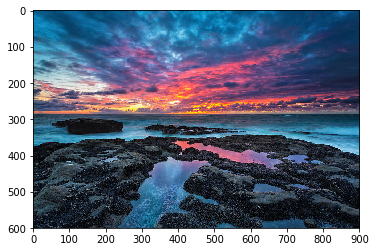

In [6]:
# filename='data/Ulun-Danu.jpg'
filename='data/serene-sunset-robert-bynum.jpg'
# img = cv2.imread(filename)
img=mpimg.imread(filename)
plt.imshow(img)

iteration number: 0, change in centroids = inf
iteration number: 1, change in centroids = 59.36332138148796
iteration number: 2, change in centroids = 30.66660892477268
iteration number: 3, change in centroids = 23.31988919540238
iteration number: 4, change in centroids = 20.51947219837074


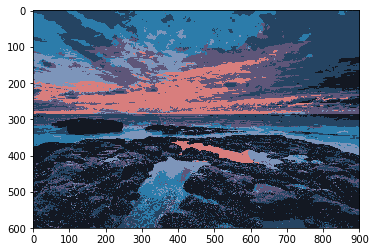

In [7]:
k, max_iter, convergence_criterion = 6, 5, 1.0
output_img = k_means_clustering(img, k, max_iter, convergence_criterion, show_progress=True)
plt.imshow(output_img)

In [8]:
# import copy
# def k_means_1clustering(img, k, max_iter, convergence_criterion):
#     (m, n, num_channels) = img.shape
#     centroid_idx = (m*n*np.random.rand(1,k)).astype(int) #vect
#     row = centroid_idx // n
#     column = centroid_idx % n
#     centroids= []
#     for (r, c) in zip(row, column):
#         centroids.append( img[r, c, :] ) #centroids is k X 3
    
    
#     while (iternum < max_iterm) and ( change < convergence_criterion): 
#         # find closest centroids
#         for i in range(m):
#             for j in range(n):
#                 dists = []
#                 for c in range(k): #loop over centroids
#                     thispoint = img(i,j,:)
#                     cent = centroids[c]
#                     # compute 2-norm distance between thispoint and cent
#                     dist = np.sqrt( sum( [p**p for p in (cent-thispoint)] ) ) # better with numpy norm
#                     dists.append(dist)

#                 chosencent[i][j] = np.argmin(dists) # chosen for the pixel

#          #for each cluster, find new centroid  
#         new_centroids = []
#         for c in range(k):
#             new_centroid = [0, 0, 0]
#             popul = 0
#             for i in range(m):
#                 for j in range(n):
#                     if chosencent[i][j]==c:
#                         new_centroid += img[i][j]
#                         popul += 1

#             new_centroids.append( new_centroid / popul )
            
#         change = np.linalg.norm( old_centroids - new_centroids) #how much has one iteration changed the centroids 
#         old_centroids = new_centroids  
#         iternum += 1
    
#     new_centroids = new_centroids.astype(int)
#     # now, assign each pixel to the closest new_centroid (the final ones)
    
#     output_img = copy.copy(img)
#     for i in range(m):
#             for j in range(n):
#                 dists = []
#                 for c in range(k): #loop over centroids
#                     thispoint = img(i,j,:)
#                     cent = new_centroids[c]
#                     # compute 2-norm distance between thispoint and cent
#                     dist = np.sqrt( sum( [p**p for p in (cent-thispoint)] ) ) # better with numpy norm
#                     dists.append(dist)
    
#                 closest_color_idx = np.argmin(dists)
#                 output_img(i,j,:) = new_centroids[ closest_color_idx ]
            
#     return output_img